In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

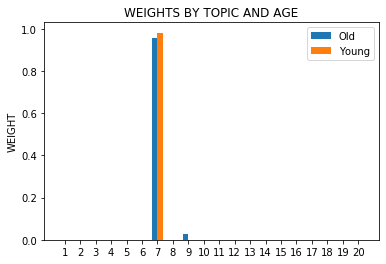

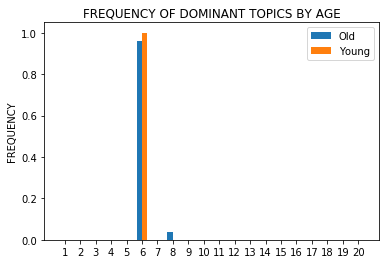

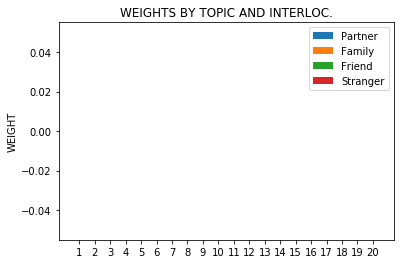

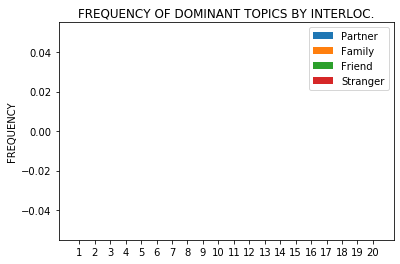

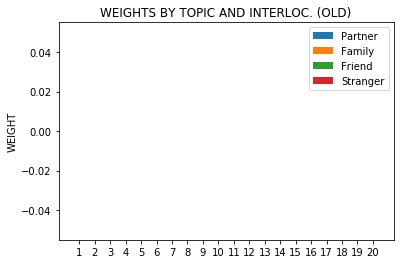

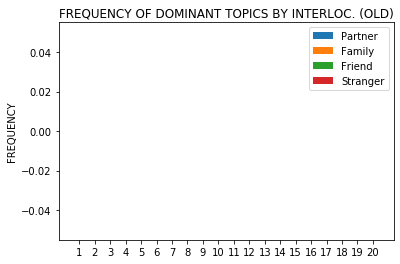

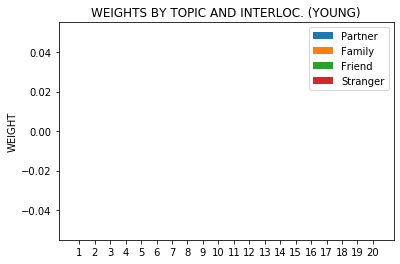

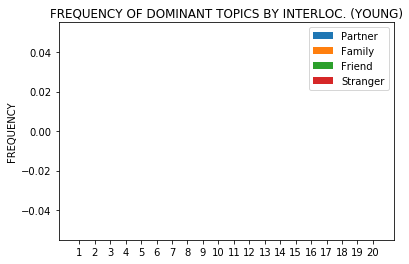

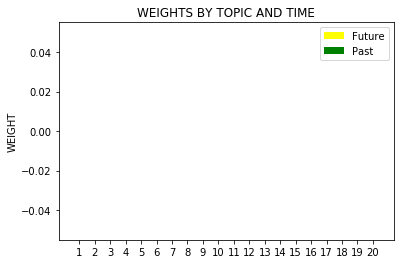

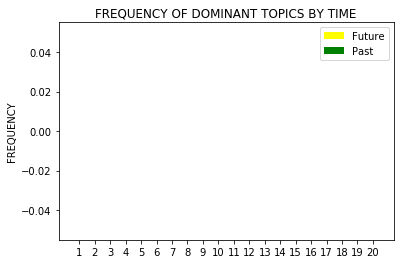

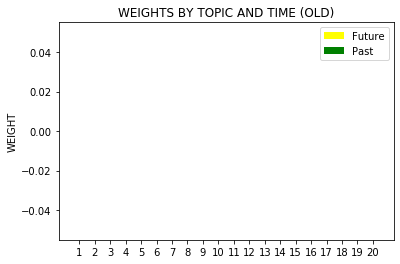

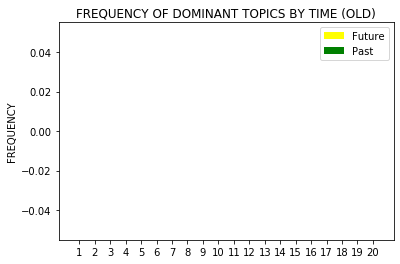

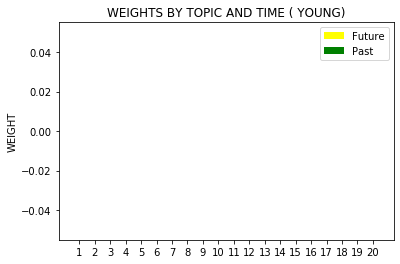

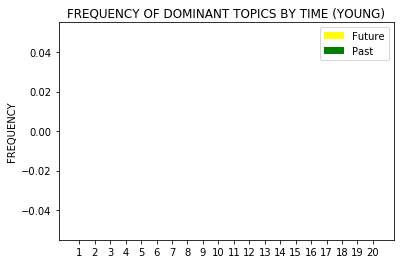

In [4]:
folder = './IO_YO/TM_LDA_P/'
model = 'lda'
n_topics = 20
max_df = 60
min_df = 2
alpha = 'None'
beta = 1.0

if (model == 'lda'):
    path = folder + model + '_min' + str(min_df) + '_max' + str(max_df) + '_alpha' + str(alpha) + '_beta' + str(beta) + '_k' + str(n_topics)
else:
    path = folder + model + '_min' + str(min_df) + '_max' + str(max_df) + '_k' + str(n_topics)

#----------------------------------------------------
# COLLECT FREQUENCY DATA, TO BE USED LATER FOR PLOTS

n_doc_all = 0
n_doc_old = 0
n_doc_young = 0
n_doc_partner = 0
n_doc_family = 0
n_doc_friend = 0
n_doc_stranger = 0
n_doc_future = 0
n_doc_past = 0

doc_per_dominant_topic_all = [0.0] * n_topics
doc_per_dominant_topic_old = [0.0] * n_topics
doc_per_dominant_topic_young = [0.0] * n_topics
doc_per_dominant_topic_partner = [0.0] * n_topics
doc_per_dominant_topic_family = [0.0] * n_topics
doc_per_dominant_topic_friend = [0.0] * n_topics
doc_per_dominant_topic_stranger = [0.0] * n_topics
doc_per_dominant_topic_future = [0.0] * n_topics
doc_per_dominant_topic_past = [0.0] * n_topics
# split old/young
doc_per_dominant_topic_partner_old = [0.0] * n_topics
doc_per_dominant_topic_family_old = [0.0] * n_topics
doc_per_dominant_topic_friend_old = [0.0] * n_topics
doc_per_dominant_topic_stranger_old = [0.0] * n_topics
doc_per_dominant_topic_future_old = [0.0] * n_topics
doc_per_dominant_topic_past_old = [0.0] * n_topics
doc_per_dominant_topic_partner_young = [0.0] * n_topics
doc_per_dominant_topic_family_young = [0.0] * n_topics
doc_per_dominant_topic_friend_young = [0.0] * n_topics
doc_per_dominant_topic_stranger_young = [0.0] * n_topics
doc_per_dominant_topic_future_young = [0.0] * n_topics
doc_per_dominant_topic_past_young = [0.0] * n_topics

weight_per_topic_all = [0.0] * n_topics
weight_per_topic_old = [0.0] * n_topics
weight_per_topic_young = [0.0] * n_topics
weight_per_topic_partner = [0.0] * n_topics
weight_per_topic_family = [0.0] * n_topics
weight_per_topic_friend = [0.0] * n_topics
weight_per_topic_stranger = [0.0] * n_topics
weight_per_topic_future = [0.0] * n_topics
weight_per_topic_past = [0.0] * n_topics
# split old/young
weight_per_topic_partner_old = [0.0] * n_topics
weight_per_topic_family_old = [0.0] * n_topics
weight_per_topic_friend_old = [0.0] * n_topics
weight_per_topic_stranger_old = [0.0] * n_topics
weight_per_topic_future_old = [0.0] * n_topics
weight_per_topic_past_old = [0.0] * n_topics
weight_per_topic_partner_young = [0.0] * n_topics
weight_per_topic_family_young = [0.0] * n_topics
weight_per_topic_friend_young = [0.0] * n_topics
weight_per_topic_stranger_young = [0.0] * n_topics
weight_per_topic_future_young = [0.0] * n_topics
weight_per_topic_past_young = [0.0] * n_topics

if model == 'lda':
    topic_weights_start = 12
else:
    topic_weights_start = 13

with open(path + '_distr.csv', encoding = 'utf-8') as f:
    for row in f:
        row = f.readline()
        row = row.replace('"', '')
        cells = row.split(';')
        age = cells[3]
        w = int(cells[5])
        partner = int(cells[6])
        family = int(cells[7])
        friend = int(cells[8])
        stranger = int(cells[9])
        past = int(cells[10])
        future = int(cells[11])
        topic_weights = cells[topic_weights_start:-1]
        dom_topic = int(cells[-1])

        n_doc_all = n_doc_all + 1
        if age == 'o':
            n_doc_old = n_doc_old + 1
        if age == 'y':
            n_doc_young = n_doc_young + 1
        if partner:
            n_doc_partner = n_doc_partner + 1
        if family:
            n_doc_family = n_doc_family + 1
        if friend:
            n_doc_friend = n_doc_friend + 1
        if stranger:
            n_doc_stranger = n_doc_stranger + 1
        if past:
            n_doc_past = n_doc_past + 1
        if future:
            n_doc_future = n_doc_future + 1

        for tIdx in range(0, n_topics):
            weight_per_topic_all[tIdx] = weight_per_topic_all[tIdx] + float(topic_weights[tIdx])
            if age == 'o':
                weight_per_topic_old[tIdx] = weight_per_topic_old[tIdx] + float(topic_weights[tIdx])
            if age == 'y':
                weight_per_topic_young[tIdx] = weight_per_topic_young[tIdx] + float(topic_weights[tIdx])
            if partner:
                weight_per_topic_partner[tIdx] = weight_per_topic_partner[tIdx] + float(topic_weights[tIdx])
                if age == 'o':
                    weight_per_topic_partner_old[tIdx] = weight_per_topic_partner_old[tIdx] + float(topic_weights[tIdx])
                if age == 'y':
                    weight_per_topic_partner_young[tIdx] = weight_per_topic_partner_young[tIdx] + float(topic_weights[tIdx])
            if family:
                weight_per_topic_family[tIdx] = weight_per_topic_family[tIdx] + float(topic_weights[tIdx])
                if age == 'o':
                    weight_per_topic_family_old[tIdx] = weight_per_topic_family_old[tIdx] + float(topic_weights[tIdx])
                if age == 'y':
                    weight_per_topic_family_young[tIdx] = weight_per_topic_family_young[tIdx] + float(topic_weights[tIdx])
            if friend:
                weight_per_topic_friend[tIdx] = weight_per_topic_friend[tIdx] + float(topic_weights[tIdx])
                if age == 'o':
                    weight_per_topic_friend_old[tIdx] = weight_per_topic_friend_old[tIdx] + float(topic_weights[tIdx])
                if age == 'y':
                    weight_per_topic_friend_young[tIdx] = weight_per_topic_friend_young[tIdx] + float(topic_weights[tIdx])
            if stranger:
                weight_per_topic_stranger[tIdx] = weight_per_topic_stranger[tIdx] + float(topic_weights[tIdx])
                if age == 'o':
                    weight_per_topic_stranger_old[tIdx] = weight_per_topic_stranger_old[tIdx] + float(topic_weights[tIdx])
                if age == 'y':
                    weight_per_topic_stranger_young[tIdx] = weight_per_topic_stranger_young[tIdx] + float(topic_weights[tIdx])
            if past:
                weight_per_topic_past[tIdx] = weight_per_topic_past[tIdx] + float(topic_weights[tIdx])
                if age == 'o':
                    weight_per_topic_past_old[tIdx] = weight_per_topic_past_old[tIdx] + float(topic_weights[tIdx])
                if age == 'y':
                    weight_per_topic_past_young[tIdx] = weight_per_topic_past_young[tIdx] + float(topic_weights[tIdx])
            if future:
                weight_per_topic_future[tIdx] = weight_per_topic_future[tIdx] + float(topic_weights[tIdx])
                if age == 'o':
                    weight_per_topic_future_old[tIdx] = weight_per_topic_future_old[tIdx] + float(topic_weights[tIdx])
                if age == 'y':
                    weight_per_topic_future_young[tIdx] = weight_per_topic_future_young[tIdx] + float(topic_weights[tIdx])
        
        if dom_topic > 0: #ignore, when dominant topic is 0
            domTIdx = dom_topic-1
            doc_per_dominant_topic_all[domTIdx] = doc_per_dominant_topic_all[domTIdx] + 1
            if age == 'o':
                doc_per_dominant_topic_old[domTIdx] = doc_per_dominant_topic_old[domTIdx] + 1
            if age == 'y':
                doc_per_dominant_topic_young[domTIdx] = doc_per_dominant_topic_young[domTIdx] + 1
            if partner:
                doc_per_dominant_topic_partner[domTIdx] = doc_per_dominant_topic_partner[domTIdx] + 1
                if age == 'o':
                    doc_per_dominant_topic_partner_old[domTIdx] = doc_per_dominant_topic_partner_old[domTIdx] + 1
                if age == 'y':
                    doc_per_dominant_topic_partner_young[domTIdx] = doc_per_dominant_topic_partner_young[domTIdx] + 1
            if family:
                doc_per_dominant_topic_family[domTIdx] = doc_per_dominant_topic_family[domTIdx] + 1
                if age == 'o':
                    doc_per_dominant_topic_family_old[domTIdx] = doc_per_dominant_topic_family_old[domTIdx] + 1
                if age == 'y':
                    doc_per_dominant_topic_family_young[domTIdx] = doc_per_dominant_topic_family_young[domTIdx] + 1
            if friend:
                doc_per_dominant_topic_friend[domTIdx] = doc_per_dominant_topic_friend[domTIdx] + 1
                if age == 'o':
                    doc_per_dominant_topic_friend_old[domTIdx] = doc_per_dominant_topic_friend_old[domTIdx] + 1
                if age == 'y':
                    doc_per_dominant_topic_friend_young[domTIdx] = doc_per_dominant_topic_friend_young[domTIdx] + 1
            if stranger:
                doc_per_dominant_topic_stranger[domTIdx] = doc_per_dominant_topic_stranger[domTIdx] + 1
                if age == 'o':
                    doc_per_dominant_topic_stranger_old[domTIdx] = doc_per_dominant_topic_stranger_old[domTIdx] + 1
                if age == 'y':
                    doc_per_dominant_topic_stranger_young[domTIdx] = doc_per_dominant_topic_stranger_young[domTIdx] + 1
            if past:
                doc_per_dominant_topic_past[domTIdx] = doc_per_dominant_topic_past[domTIdx] + 1
                if age == 'o':
                    doc_per_dominant_topic_past_old[domTIdx] = doc_per_dominant_topic_past_old[domTIdx] + 1
                if age == 'y':
                    doc_per_dominant_topic_past_young[domTIdx] = doc_per_dominant_topic_past_young[domTIdx] + 1
            if future:
                doc_per_dominant_topic_future[domTIdx] = doc_per_dominant_topic_future[domTIdx] + 1
                if age == 'o':
                    doc_per_dominant_topic_future_old[domTIdx] = doc_per_dominant_topic_future_old[domTIdx] + 1
                if age == 'y':
                    doc_per_dominant_topic_future_young[domTIdx] = doc_per_dominant_topic_future_young[domTIdx] + 1

#--------------------------------
# NORMALIZE THE FREQUENCY

if n_doc_all > 0:
    doc_freq_per_dominant_topic_all = [n / n_doc_all for n in doc_per_dominant_topic_all]
else:
    doc_freq_per_dominant_topic_all = [0 for n in doc_per_dominant_topic_all]
if n_doc_old > 0:
    doc_freq_per_dominant_topic_old = [n / n_doc_old for n in doc_per_dominant_topic_old]
else:
    doc_freq_per_dominant_topic_old = [0 for n in doc_per_dominant_topic_old]
if n_doc_young > 0:
    doc_freq_per_dominant_topic_young = [n / n_doc_young for n in doc_per_dominant_topic_young]
else:
    doc_freq_per_dominant_topic_young = [0 for n in doc_per_dominant_topic_young]
if n_doc_partner > 0:
    doc_freq_per_dominant_topic_partner = [n / n_doc_partner for n in doc_per_dominant_topic_partner]
else:
    doc_freq_per_dominant_topic_partner = [0 for n in doc_per_dominant_topic_partner]
if n_doc_family > 0:
    doc_freq_per_dominant_topic_family = [n / n_doc_family for n in doc_per_dominant_topic_family]
else:
    doc_freq_per_dominant_topic_family = [0 for n in doc_per_dominant_topic_family]
if n_doc_friend > 0:
    doc_freq_per_dominant_topic_friend = [n / n_doc_friend for n in doc_per_dominant_topic_friend]
else:
    doc_freq_per_dominant_topic_friend = [0 for n in doc_per_dominant_topic_friend]
if n_doc_stranger > 0:
    doc_freq_per_dominant_topic_stranger = [n / n_doc_stranger for n in doc_per_dominant_topic_stranger]
else:
    doc_freq_per_dominant_topic_stranger = [0 for n in doc_per_dominant_topic_stranger]
if n_doc_future > 0:
    doc_freq_per_dominant_topic_future = [n / n_doc_future for n in doc_per_dominant_topic_future]
else:
    doc_freq_per_dominant_topic_future = [0 for n in doc_per_dominant_topic_future]
if n_doc_past > 0:
    doc_freq_per_dominant_topic_past = [n / n_doc_past for n in doc_per_dominant_topic_past]
else:
    doc_freq_per_dominant_topic_past = [0 for n in doc_per_dominant_topic_past]
    
# OLD AND YOUNG
if n_doc_partner > 0:
    doc_freq_per_dominant_topic_partner_old = [n / n_doc_partner for n in doc_per_dominant_topic_partner_old]
else:
    doc_freq_per_dominant_topic_partner_old = [0 for n in doc_per_dominant_topic_partner_old]
if n_doc_family > 0:
    doc_freq_per_dominant_topic_family_old = [n / n_doc_family for n in doc_per_dominant_topic_family_old]
else:
    doc_freq_per_dominant_topic_family_old = [0 for n in doc_per_dominant_topic_family_old]
if n_doc_friend > 0:
    doc_freq_per_dominant_topic_friend_old = [n / n_doc_friend for n in doc_per_dominant_topic_friend_old]
else:
    doc_freq_per_dominant_topic_friend_old = [0 for n in doc_per_dominant_topic_friend_old]
if n_doc_stranger > 0:
    doc_freq_per_dominant_topic_stranger_old = [n / n_doc_stranger for n in doc_per_dominant_topic_stranger_old]
else:
    doc_freq_per_dominant_topic_stranger_old = [0 for n in doc_per_dominant_topic_stranger_old]
if n_doc_future > 0:
    doc_freq_per_dominant_topic_future_old = [n / n_doc_future for n in doc_per_dominant_topic_future_old]
else:
    doc_freq_per_dominant_topic_future_old = [0 for n in doc_per_dominant_topic_future_old]
if n_doc_past > 0:
    doc_freq_per_dominant_topic_past_old = [n / n_doc_past for n in doc_per_dominant_topic_past_old]
else:
    doc_freq_per_dominant_topic_past_old = [0 for n in doc_per_dominant_topic_past_old]
    
if n_doc_partner > 0:
    doc_freq_per_dominant_topic_partner_young = [n / n_doc_partner for n in doc_per_dominant_topic_partner_young]
else:
    doc_freq_per_dominant_topic_partner_young = [0 for n in doc_per_dominant_topic_partner_young]
if n_doc_family > 0:
    doc_freq_per_dominant_topic_family_young = [n / n_doc_family for n in doc_per_dominant_topic_family_young]
else:
    doc_freq_per_dominant_topic_family_young = [0 for n in doc_per_dominant_topic_family_young]
if n_doc_friend > 0:
    doc_freq_per_dominant_topic_friend_young = [n / n_doc_friend for n in doc_per_dominant_topic_friend_young]
else:
    doc_freq_per_dominant_topic_friend_young = [0 for n in doc_per_dominant_topic_friend_young]
if n_doc_stranger > 0:
    doc_freq_per_dominant_topic_stranger_young = [n / n_doc_stranger for n in doc_per_dominant_topic_stranger_young]
else:
    doc_freq_per_dominant_topic_stranger_young = [0 for n in doc_per_dominant_topic_stranger_young]
if n_doc_future > 0:
    doc_freq_per_dominant_topic_future_young = [n / n_doc_future for n in doc_per_dominant_topic_future_young]
else:
    doc_freq_per_dominant_topic_future_young = [0 for n in doc_per_dominant_topic_future_young]
if n_doc_past > 0:
    doc_freq_per_dominant_topic_past_young = [n / n_doc_past for n in doc_per_dominant_topic_past_young]
else:
    doc_freq_per_dominant_topic_past_young = [0 for n in doc_per_dominant_topic_past_young]
    
if sum(weight_per_topic_all) > 0:
    rel_weight_per_topic_all = [w / sum(weight_per_topic_all) for w in weight_per_topic_all]
else:
    rel_weight_per_topic_all = [0 for w in weight_per_topic_all]
if sum(weight_per_topic_old) > 0:
    rel_weight_per_topic_old = [w / sum(weight_per_topic_old) for w in weight_per_topic_old]
else:
    rel_weight_per_topic_old = [0 for w in weight_per_topic_old]
if sum(weight_per_topic_young) > 0:
    rel_weight_per_topic_young = [w / sum(weight_per_topic_young) for w in weight_per_topic_young]
else:
    rel_weight_per_topic_young = [0 for w in weight_per_topic_young]
if sum(weight_per_topic_partner) > 0:
    rel_weight_per_topic_partner = [w / sum(weight_per_topic_partner) for w in weight_per_topic_partner]
else:
    rel_weight_per_topic_partner = [0 for w in weight_per_topic_partner]
if sum(weight_per_topic_family) > 0:
    rel_weight_per_topic_family = [w / sum(weight_per_topic_family) for w in weight_per_topic_family]
else:
    rel_weight_per_topic_family = [0 for w in weight_per_topic_family]
if sum(weight_per_topic_friend) > 0:
    rel_weight_per_topic_friend = [w / sum(weight_per_topic_friend) for w in weight_per_topic_friend]
else:
    rel_weight_per_topic_friend = [0 for w in weight_per_topic_friend]
if sum(weight_per_topic_stranger) > 0:
    rel_weight_per_topic_stranger = [w / sum(weight_per_topic_stranger) for w in weight_per_topic_stranger]
else:
    rel_weight_per_topic_stranger = [0 for w in weight_per_topic_stranger]
if sum(weight_per_topic_future) > 0:
    rel_weight_per_topic_future = [w / sum(weight_per_topic_future) for w in weight_per_topic_future]
else:
    rel_weight_per_topic_future = [0 for w in weight_per_topic_future]
if sum(weight_per_topic_past) > 0:
    rel_weight_per_topic_past = [w / sum(weight_per_topic_past) for w in weight_per_topic_past]
else:
    rel_weight_per_topic_past = [0 for w in weight_per_topic_past]

# OLD AND YOUNG
if sum(weight_per_topic_partner) > 0:
    rel_weight_per_topic_partner_old = [w / sum(weight_per_topic_partner) for w in weight_per_topic_partner_old]
else:
    rel_weight_per_topic_partner_old = [0 for w in weight_per_topic_partner_old]
if sum(weight_per_topic_family) > 0:
    rel_weight_per_topic_family_old = [w / sum(weight_per_topic_family) for w in weight_per_topic_family_old]
else:
    rel_weight_per_topic_family_old = [0 for w in weight_per_topic_family_old]
if sum(weight_per_topic_friend) > 0:
    rel_weight_per_topic_friend_old = [w / sum(weight_per_topic_friend) for w in weight_per_topic_friend_old]
else:
    rel_weight_per_topic_friend_old = [0 for w in weight_per_topic_friend_old]
if sum(weight_per_topic_stranger) > 0:
    rel_weight_per_topic_stranger_old = [w / sum(weight_per_topic_stranger) for w in weight_per_topic_stranger_old]
else:
    rel_weight_per_topic_stranger_old = [0 for w in weight_per_topic_stranger_old]
if sum(weight_per_topic_future) > 0:
    rel_weight_per_topic_future_old = [w / sum(weight_per_topic_future) for w in weight_per_topic_future_old]
else:
    rel_weight_per_topic_future_old = [0 for w in weight_per_topic_future_old]
    
if sum(weight_per_topic_past) > 0:
    rel_weight_per_topic_past_old = [w / sum(weight_per_topic_past) for w in weight_per_topic_past_old]
else:
    rel_weight_per_topic_past_old = [0 for w in weight_per_topic_past_old]
if sum(weight_per_topic_partner) > 0:
    rel_weight_per_topic_partner_young = [w / sum(weight_per_topic_partner) for w in weight_per_topic_partner_young]
else:
    rel_weight_per_topic_partner_young = [0 for w in weight_per_topic_partner_young]
if sum(weight_per_topic_family) > 0:
    rel_weight_per_topic_family_young = [w / sum(weight_per_topic_family) for w in weight_per_topic_family_young]
else:
    rel_weight_per_topic_family_young = [0 for w in weight_per_topic_family_young]
if sum(weight_per_topic_friend) > 0:
    rel_weight_per_topic_friend_young = [w / sum(weight_per_topic_friend) for w in weight_per_topic_friend_young]
else:
    rel_weight_per_topic_friend_young = [0 for w in weight_per_topic_friend_young]
if sum(weight_per_topic_stranger) > 0:
    rel_weight_per_topic_stranger_young = [w / sum(weight_per_topic_stranger) for w in weight_per_topic_stranger_young]
else:
    rel_weight_per_topic_stranger_young = [0 for w in weight_per_topic_stranger_young]
if sum(weight_per_topic_future) > 0:
    rel_weight_per_topic_future_young = [w / sum(weight_per_topic_future) for w in weight_per_topic_future_young]
else:
    rel_weight_per_topic_future_young = [0 for w in weight_per_topic_future_young]
if sum(weight_per_topic_past) > 0:
    rel_weight_per_topic_past_young = [w / sum(weight_per_topic_past) for w in weight_per_topic_past_young]
else:
    rel_weight_per_topic_past_young = [0 for w in weight_per_topic_past_young]

#-----------------------------------------
# PLOTING
# SOURCE: https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html

x = np.arange(n_topics)  # the label locations
width = 0.35  # the width of the columns

#-----------------------------------------
# OLD / YOUNG, TOPIC WEIGHTS

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rel_weight_per_topic_old, width, label='Old')
rects2 = ax.bar(x + width/2, rel_weight_per_topic_young, width, label='Young')

ax.set_ylabel('WEIGHT')
ax.set_title('WEIGHTS BY TOPIC AND AGE')
ax.set_xticks(x)
ax.set_xticklabels(range(1,n_topics+1))
ax.legend()

plt.savefig('./rel_weight_by_age.png')

# OLD AND YOUNG, DOMINANT TOPICS
fig, ax = plt.subplots()
ax.bar(x - width/2, doc_freq_per_dominant_topic_old, width, label='Old')
ax.bar(x + width/2, doc_freq_per_dominant_topic_young, width, label='Young')

ax.set_ylabel('FREQUENCY')
ax.set_title('FREQUENCY OF DOMINANT TOPICS BY AGE')
ax.set_xticks(x)
ax.set_xticklabels(range(1,n_topics+1))
ax.legend()

plt.savefig('./dom_topic_by_age.png')

#-----------------------------------------
# INTERLOCUTOR, TOPIC WEIGHTS

# CALCULATE ALL
fig, ax = plt.subplots()
ax.bar(x - 3*width/4, rel_weight_per_topic_partner, width/2, label='Partner')
ax.bar(x - width/4, rel_weight_per_topic_family, width/2, label='Family')
ax.bar(x + width/4, rel_weight_per_topic_friend, width/2, label='Friend')
ax.bar(x + 3*width/4, rel_weight_per_topic_stranger, width/2, label='Stranger')

ax.set_ylabel('WEIGHT')
ax.set_title('WEIGHTS BY TOPIC AND INTERLOC.')
ax.set_xticks(x)
ax.set_xticklabels(range(1,n_topics+1))
ax.legend()

plt.savefig('./rel_weight_by_interlocutor.png')

# INTERLOCUTOR, DOMINANT TOPIC
fig, ax = plt.subplots()
ax.bar(x - 3*width/4, doc_freq_per_dominant_topic_partner, width/2, label='Partner')
ax.bar(x - width/4, doc_freq_per_dominant_topic_family, width/2, label='Family')
ax.bar(x + width/4, doc_freq_per_dominant_topic_friend, width/2, label='Friend')
ax.bar(x + 3*width/4, doc_freq_per_dominant_topic_stranger, width/2, label='Stranger')

ax.set_ylabel('FREQUENCY')
ax.set_title('FREQUENCY OF DOMINANT TOPICS BY INTERLOC.')
ax.set_xticks(x)
ax.set_xticklabels(range(1,n_topics+1))
ax.legend()

plt.savefig('./dom_topic_by_interlocutor.png')

# CALCULATE OLD
fig, ax = plt.subplots()
ax.bar(x - 3*width/4, rel_weight_per_topic_partner_old, width/2, label='Partner')
ax.bar(x - width/4, rel_weight_per_topic_family_old, width/2, label='Family')
ax.bar(x + width/4, rel_weight_per_topic_friend_old, width/2, label='Friend')
ax.bar(x + 3*width/4, rel_weight_per_topic_stranger_old, width/2, label='Stranger')

ax.set_ylabel('WEIGHT')
ax.set_title('WEIGHTS BY TOPIC AND INTERLOC. (OLD)')
ax.set_xticks(x)
ax.set_xticklabels(range(1,n_topics+1))
ax.legend()

plt.savefig('./rel_weight_by_interlocutor_old.png')

# INTERLOCUTOR, DOMINANT TOPIC
fig, ax = plt.subplots()
ax.bar(x - 3*width/4, doc_freq_per_dominant_topic_partner_old, width/2, label='Partner')
ax.bar(x - width/4, doc_freq_per_dominant_topic_family_old, width/2, label='Family')
ax.bar(x + width/4, doc_freq_per_dominant_topic_friend_old, width/2, label='Friend')
ax.bar(x + 3*width/4, doc_freq_per_dominant_topic_stranger_old, width/2, label='Stranger')

ax.set_ylabel('FREQUENCY')
ax.set_title('FREQUENCY OF DOMINANT TOPICS BY INTERLOC. (OLD)')
ax.set_xticks(x)
ax.set_xticklabels(range(1,n_topics+1))
ax.legend()

plt.savefig('./dom_topic_by_interlocutor_old.png')

# CALCULATE YOUNG
fig, ax = plt.subplots()
ax.bar(x - 3*width/4, rel_weight_per_topic_partner_young, width/2, label='Partner')
ax.bar(x - width/4, rel_weight_per_topic_family_young, width/2, label='Family')
ax.bar(x + width/4, rel_weight_per_topic_friend_young, width/2, label='Friend')
ax.bar(x + 3*width/4, rel_weight_per_topic_stranger_young, width/2, label='Stranger')

ax.set_ylabel('WEIGHT')
ax.set_title('WEIGHTS BY TOPIC AND INTERLOC. (YOUNG)')
ax.set_xticks(x)
ax.set_xticklabels(range(1,n_topics+1))
ax.legend()

plt.savefig('./rel_weight_by_interlocutor_young.png')

# INTERLOCUTOR, DOMINANT TOPIC
fig, ax = plt.subplots()
ax.bar(x - 3*width/4, doc_freq_per_dominant_topic_partner_young, width/2, label='Partner')
ax.bar(x - width/4, doc_freq_per_dominant_topic_family_young, width/2, label='Family')
ax.bar(x + width/4, doc_freq_per_dominant_topic_friend_young, width/2, label='Friend')
ax.bar(x + 3*width/4, doc_freq_per_dominant_topic_stranger_young, width/2, label='Stranger')

ax.set_ylabel('FREQUENCY')
ax.set_title('FREQUENCY OF DOMINANT TOPICS BY INTERLOC. (YOUNG)')
ax.set_xticks(x)
ax.set_xticklabels(range(1,n_topics+1))
ax.legend()

plt.savefig('./dom_topic_by_interlocutor_young.png')

#-----------------------------------------------------
# TIME FOCUS (FUTURE/PAST), TOPIC WEIGHTS

# CALCULATE ALL
fig, ax = plt.subplots()
ax.bar(x - width/2, rel_weight_per_topic_future, width, label='Future', color='yellow')
ax.bar(x + width/2, rel_weight_per_topic_past, width, label='Past', color='green')

ax.set_ylabel('WEIGHT')
ax.set_title('WEIGHTS BY TOPIC AND TIME')
ax.set_xticks(x)
ax.set_xticklabels(range(1,n_topics+1))
ax.legend()

plt.savefig('./rel_weight_by_time.png')

# FUTURE / PAST, DOMINANT TOPIC
fig, ax = plt.subplots()
ax.bar(x - width/2, doc_freq_per_dominant_topic_future, width, label='Future', color='yellow')
ax.bar(x + width/2, doc_freq_per_dominant_topic_past, width, label='Past', color='green')

ax.set_ylabel('FREQUENCY')
ax.set_title('FREQUENCY OF DOMINANT TOPICS BY TIME')
ax.set_xticks(x)
ax.set_xticklabels(range(1,n_topics+1))
ax.legend()

plt.savefig('./dom_topic_by_time.png')

# CALCULATE OLD
fig, ax = plt.subplots()
ax.bar(x - width/2, rel_weight_per_topic_future_old, width, label='Future', color='yellow')
ax.bar(x + width/2, rel_weight_per_topic_past_old, width, label='Past', color='green')

ax.set_ylabel('WEIGHT')
ax.set_title('WEIGHTS BY TOPIC AND TIME (OLD)')
ax.set_xticks(x)
ax.set_xticklabels(range(1,n_topics+1))
ax.legend()

plt.savefig('./rel_weight_by_time_old.png')

# FUTURE / PAST, DOMINANT TOPIC
fig, ax = plt.subplots()
ax.bar(x - width/2, doc_freq_per_dominant_topic_future_old, width, label='Future', color='yellow')
ax.bar(x + width/2, doc_freq_per_dominant_topic_past_old, width, label='Past', color='green')

ax.set_ylabel('FREQUENCY')
ax.set_title('FREQUENCY OF DOMINANT TOPICS BY TIME (OLD)')
ax.set_xticks(x)
ax.set_xticklabels(range(1,n_topics+1))
ax.legend()

plt.savefig('./dom_topic_by_time_old.png')

# CALCULATE YOUNG
fig, ax = plt.subplots()
ax.bar(x - width/2, rel_weight_per_topic_future_young, width, label='Future', color='yellow')
ax.bar(x + width/2, rel_weight_per_topic_past_young, width, label='Past', color='green')

ax.set_ylabel('WEIGHT')
ax.set_title('WEIGHTS BY TOPIC AND TIME ( YOUNG)')
ax.set_xticks(x)
ax.set_xticklabels(range(1,n_topics+1))
ax.legend()

plt.savefig('./rel_weight_by_time_young.png')

# FUTURE / PAST, DOMINANT TOPIC
fig, ax = plt.subplots()
ax.bar(x - width/2, doc_freq_per_dominant_topic_future_young, width, label='Future', color='yellow')
ax.bar(x + width/2, doc_freq_per_dominant_topic_past_young, width, label='Past', color='green')

ax.set_ylabel('FREQUENCY')
ax.set_title('FREQUENCY OF DOMINANT TOPICS BY TIME (YOUNG)')
ax.set_xticks(x)
ax.set_xticklabels(range(1,n_topics+1))
ax.legend()

plt.savefig('./dom_topic_by_time_young.png')